<a href="https://colab.research.google.com/github/thaislin0/Modelos-de-Machine-Learning/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear
Vamos verificar, na prática, como o algoritmo de Regressão Linear consegue resolver problemas do nosso cotidiano.

O objetivo é estimar o preço de uma casa dado os metros quadrados. Utilizaremos o pandas e o scikit.

In [1]:
# Importação da biblioteca pandas
import pandas as pd

In [2]:
# Criação de uma variável com a função de leitura de um arquivo excel
base = pd.read_excel('/content/casas.xlsx')

In [3]:
# Verificação de quantas linhas e colunas há na base de dados
base.shape

(21613, 3)

In [4]:
# Verificação das 5 primeiras linhas da base de dados com o uso de head(). O valor pode ser alterado para o desejado, sendo 5 o padrão
base.head()

,Unnamed: 0,metros quadrados,preco
0,0,1180,221900
1,1,2570,538000
2,2,770,180000
3,3,1960,604000
4,4,1680,510000


In [5]:
# Exclusão da coluna "Unnamed: 0"
del base['Unnamed: 0']

In [6]:
base.head()

,metros quadrados,preco
0,1180,221900
1,2570,538000
2,770,180000
3,1960,604000
4,1680,510000


In [7]:
# Plotação de um gráfico para mostrar a dispersão dos dados. O % e inline significa que o gráfico será mostrado aqui no notebook, e não em um arquivo
%matplotlib inline

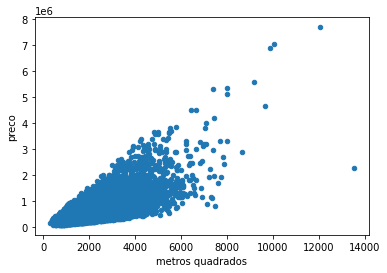

In [8]:
# Plotação do gráfico de tipo "dispersado" com os dados de metros quadrados e preço
base.plot(kind='scatter', x="metros quadrados", y="preco")

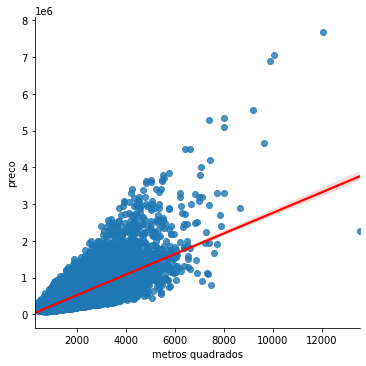

In [35]:
# Plotação do mesmo gráfico acima, porém utilizando a biblioteca Seaborn, com uma linha indicando a regressão
import seaborn as sns
sns.lmplot(data=base, x = 'metros quadrados', y = 'preco', line_kws={'color': 'red'})

In [9]:
# x: seleção de todas as linhas e colunas, menos a última, pois ela é a coluna que nosso modelo irá tentar prever
#y: selecção de todas as linhas, porém apenas a última coluna, pois ela servirá como treinamento para o modelo
x = base[["metros quadrados"]]
y = base[["preco"]]

In [36]:
# Verificação da variável "x"
x

,metros quadrados
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [37]:
# Verificação da variável "y"
y

,metros quadrados
0,287555.067025
1,677621.826402
2,172499.404187
3,506441.449985
4,427866.850973
...,...
21608,385773.315789
21609,604659.698749
21610,242655.296161
21611,405416.965541


# Regressão Linear

De acordo com o google: "A regressão linear quantifica a relação entre uma ou mais variáveis ​​preditoras e uma variável de resultado. Por exemplo, a regressão linear pode ser usada para quantificar os impactos relativos de idade, sexo e dieta (as variáveis ​​preditoras) na altura (a variável de desfecho)."

O modelo de regressão linear é baseado em uma equação de primeiro grau, com a fórmula sendo: y = ax + b. O "x" é o coeficiente angular e o "b" é o coeficiente linear. 

Coeficiente angular: indica a inclinação da reta
Coeficiente linear: realiza a intersecção com o eixo x

A fórmula da regressão linear busca, justamente, encontrar o valor de a e de b. Neste caso, utilizaremos esse modelo para estimar um novo valor baseado nos atributos de entrada. 

Ajustaremos uma equação linear entre os dados observados, ou seja, encontraremo uma reta que melhor explica a relação entre os dados. 

Para saber mais sobre a regressão linear visite: https://oestatistico.com.br/regressao-linear-simples/

In [12]:
# Importação da biblioteca sklearn
from sklearn.linear_model import LinearRegression

In [38]:
# Criação de uma instância, ou seja, um objeto a partir do classificador
regressao = LinearRegression()

In [39]:
# A função fit é a responsável por fazer o treinamento do algoritmo
regressao.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Verificação da inclinação/coeficiente angular da reta
coef = regressao.coef_

In [16]:
# Verificação da inclinação/coeficiente linear da reta
inter = regressao.intercept_

In [17]:
# Montagem da equação: y = coef * x + inter

In [40]:
# Montagem da equação utilizando as variáveis criadas anteriormente
y = coef * x + (inter)

In [41]:
# A função predict já pode ser utilizada para fazer a previsão. Neste caso, o modelo utilizou um novo dado.
regressao.predict([[1500]])

array([[377354.6087517]])

In [42]:
# Novamente, a fórmula de regressão linear
regressao.coef_[0] * 1500 + regressao.intercept_[0]

array([377354.6087517])

# Resumo
Importamos a biblioteca de manipulação de dados e de machine learning: pandas e scikit-learn respectivamente.

pandas: https://pandas.pydata.org/ scikit-learn: https://scikit-learn.org/stable/

Em seguida, verificamos os dados, tratamos rapidamente eles (excluindo uma coluna desnecessária) e então iniciamos a modelagem.

Os dados foram separados em dois: de entrada e de saída. Após a separação, realizamos os testes necessários com a inserção de novos valores de metros quadrados para o modelo prever, de acordo com o seu treinamento, qual seria o custo de uma casa com aqueles dados.